### Before evaluation we will load the model that was trained on colab and make prediction on images

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [2]:
model = YOLO(r"E:\Work\Data_Science\Projects\Custom_Object_Detection\Custom_Object_Detection_YOLOv8\runs\detect\train3\weights\best.pt")

In [3]:
# try with one test image
img = cv2.imread(r'E:\Work\Data_Science\Projects\Custom_Object_Detection\data\training_demo\test\images\026.jpeg', cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
pred = model.predict(img)[0]

Ultralytics YOLOv8.0.49  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

0: 640x544 2 sec_1s, 1 sec_2, 7 sec_3s, 1 sec_4, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 40.8ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
boxes = pred.boxes  # Boxes object for bbox outputs
masks = pred.masks  # Masks object for segmenation masks outputs
probs = pred.probs 

In [6]:
# plot the predictions on the image
pred_plotted = pred.plot()
pred_plotted.shape

(595, 480, 3)

In [7]:
cv2.imshow('prediction', pred_plotted)
cv2.waitKey(0)
cv2.destroyAllWindows()

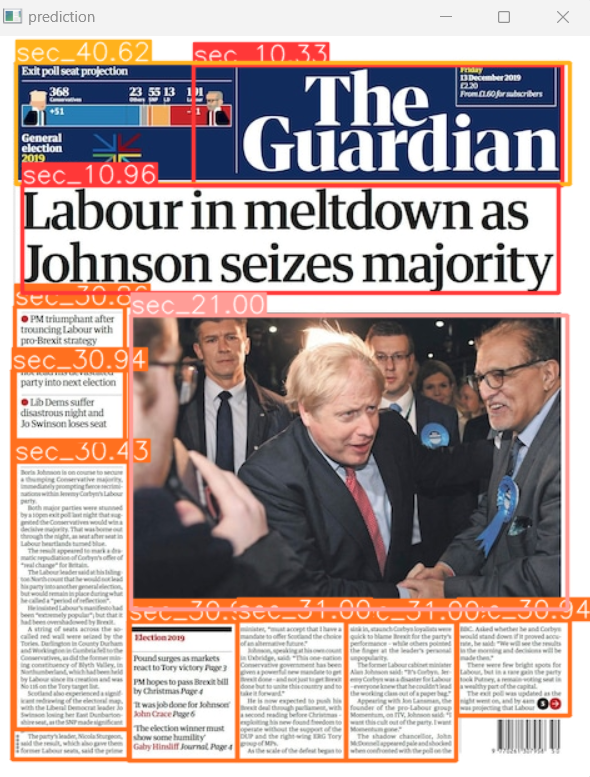

### great! Honestly I didn't expect this to give such decent results at first shot. LOL

# Let's evaluate the model

In [15]:
# Argumentents:-

# Name          Default Details

# data          None    path to data file, i.e. data.yaml
# imgsz         640     image size as scalar or (h, w) list, i.e. (640, 480)
# batch	        16      number of images per batch (-1 for AutoBatch)
# save_json     False   save results to JSON file
# save_hybrid   False   save hybrid version of labels (labels + additional predictions)
# conf	        0.001	object confidence threshold for detection
# iou	        0.6	    intersection over union (IoU) threshold for NMS
# max_det	    300	    maximum number of detections per image
# half	        True	use half precision (FP16)
# device	    None	device to run on, i.e. cuda device=0/1/2/3 or device=cpu
# dnn	        False	use OpenCV DNN for ONNX inference
# plots	        False	show plots during training
# rect	        False	support rectangular evaluation
# split	        val	    dataset split to use for validation, i.e. 'val', 'test' or 'train'

In [10]:
metrics = model.val(
                    data="E:\Work\Data_Science\Projects\Custom_Object_Detection\Custom_Object_Detection_YOLOv8\data.yaml"
                    )

Ultralytics YOLOv8.0.49  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
val: Scanning E:\Work\Data_Science\Projects\Custom_Object_Detection\data\training_demo\test\labels.cache... 8 images, 0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<0
                   all          8         98      0.814      0.854      0.883      0.716
                 sec_1          8         26      0.937      0.692      0.879      0.627
                 sec_2          8         10       0.68      0.852      0.821      0.731
                 sec_3          8         54      0.797       0.87      0.836      0.658
                 sec_4          8          8      0.844          1      0.995      0.847
Speed: 0.7ms preprocess, 13.4ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs\detect\val3


In [11]:
metrics.box.map    # map50-95

0.7156389613030025

In [12]:
metrics.box.map50  # map50

0.882884015392591

In [13]:
metrics.box.map75  # map75

0.8275618112481365

In [14]:
metrics.box.maps   # a list contains map50-95 of each category

array([    0.62656,      0.7307,     0.65794,     0.84736])